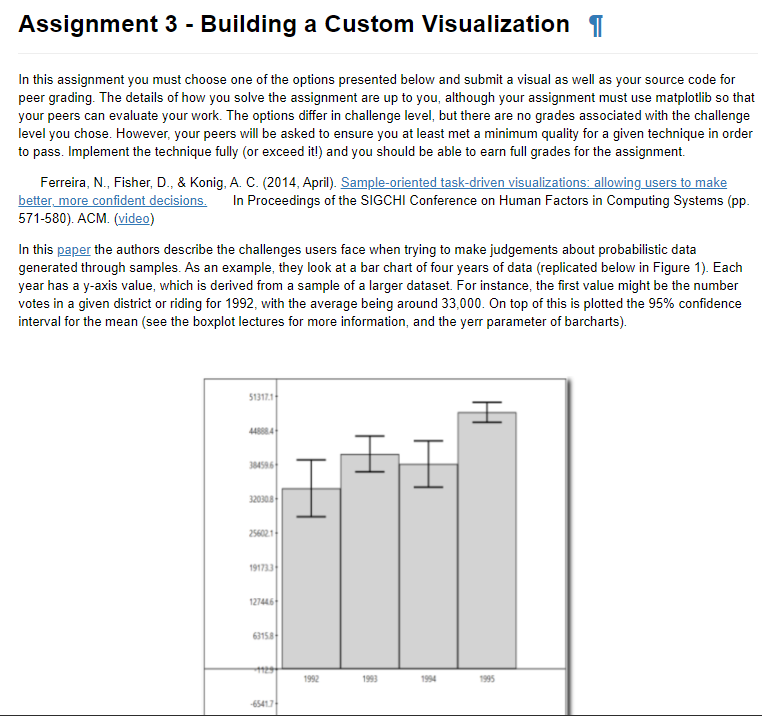

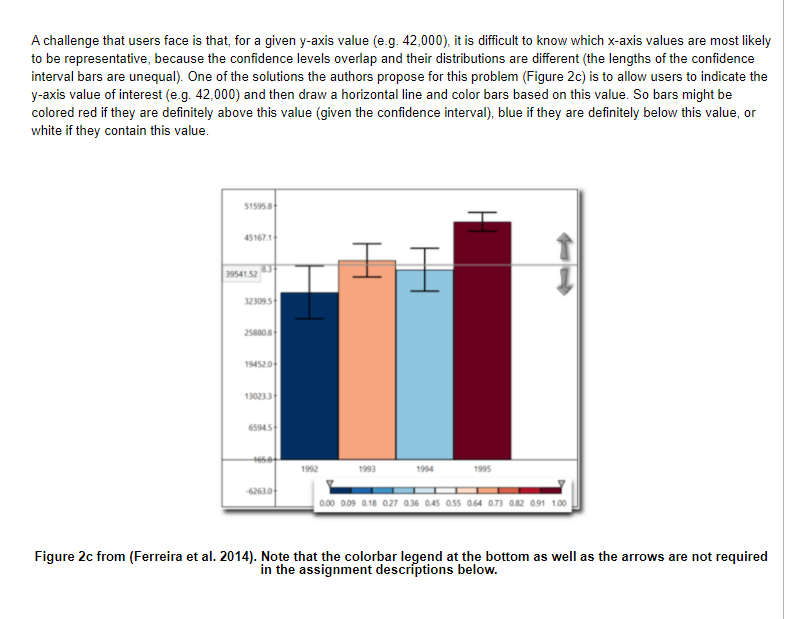


<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [72]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# Y is the value of interest (the horizontal line)
Y = 40000



np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
# See a description of the data to get an idea 
df = df.transpose()
print(df)

df.describe()

               1992           1993           1994           1995
0      -8941.531897  -51896.094813  152336.932066  -69708.439062
1     127788.667612  198350.518755  192947.128056  -13289.977022
2     -71887.743011 -123518.252821  389950.263156  -30178.390991
3     -79146.060869 -129916.759685  -93006.152024   55052.181256
4     425156.114501  216119.147314  100818.575896  152883.621657
...             ...            ...            ...            ...
3645   24185.008589  -37333.493572  -71861.846997   39937.199964
3646  -56826.729535  103019.841174   26375.113219  139472.114293
3647  -67319.766489  179746.127403  -29328.078384   59386.186379
3648  113377.299342   13455.493990   65858.761714   73362.229590
3649   -4494.878538   34442.898855  -91542.001049   28705.082908

[3650 rows x 4 columns]


,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [73]:
# calculate the mean of each column of the data
mean = list(df.mean())
# and the standard deviation too
std = list(df.std())


#Now, we add a 96% interval of confidence for each mean
# To get the 96% interval, we need to calculate the standard 
# deviation of the mean 
# of each year

devmean = [std[i]/math.sqrt(len(df)) for i in range(4)]
print('deviation to the means are:', devmean)

# Now, the real mean must be at most 1.96 standard deviations from the mean
# so we calculate the size of these intervals:
si= []
#deviation to the mean
for i in range (4) :
    si.append(1.96*(std[i]/math.sqrt(len(df))))
    
print(si) 

deviation to the means are: [3320.866311209348, 1628.701180453587, 2323.4195342286926, 1155.0264001583553]
[6508.897969970322, 3192.254313689031, 4553.902287088237, 2263.8517443103765]


1992    6687.892524
1993   -1861.859541
1994     506.695059
1995   -7743.550969
Name: diff, dtype: float64
1992    1.0
1993   -1.0
1994    1.0
1995   -1.0
Name: sign, dtype: float64
1992   -0.300393
1993    0.170513
1994   -0.032529
1995    1.000000
Name: color, dtype: float64
[(0, 0, 0.8498035573133151), (0.9147435475679271, 0, 0), (0, 0, 0.9837354973890584), (0.5, 0, 0)]


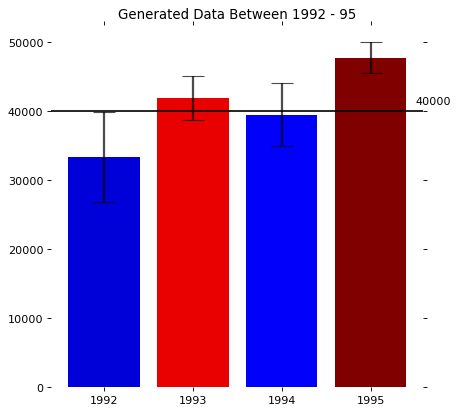

In [74]:


# create a new data frame
df_p = pd.DataFrame()

# add the column 'diff'
# in this column, we see the difference from the value of interest to each
# point in the mean
df_p['diff'] = Y - df.mean()

print(df_p['diff'])


#we add another column
# put a 1 if Y is above the mean and put a -1 if Y is below the mean
df_p['sign'] = df_p['diff'].abs()/df_p['diff']
print(df_p['sign'])



# see the maximum difference of Y to the farthest 
ran = max(abs(df_p['diff']).min(), df_p['diff'].abs().max())


# a column with the color of each column
# blue if the mean is below Y and redder if it is above Y

# we assign a number going from -1 to 1 (-1 beign bluest and 1 being reddest)
df_p['color'] = (-(Y - df.mean())/devmean)/max(abs((Y - df.mean())/devmean));


print(df_p['color'])
shade = df_p['color']



# we make a list of the color, using blue if shade is negative
# and red if shade is positive.

color = [(0,0,0.5+(1+x)/2) if  x <= 0 else (0.5+(1-x)/2,0,0)
         for x in shade]

print(color)






%matplotlib inline

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(range(len(df.columns)), height = df.values.mean(axis = 0), 
        yerr=si, error_kw={'capsize': 10, 'elinewidth': 2, 'alpha':0.7},
        color = color)

plt.axhline(y=Y, color = 'black', label = 'Y')

plt.text(3.5, Y+1000, str(Y))

plt.xticks(range(len(df.columns)), df.columns)

plt.title('Generated Data Between 1992 - 95')

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off',  right='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()